In [33]:
%load_ext autoreload
%autoreload 1

import os
import sys

root_dir = os.path.join(os.getcwd(),os.pardir,os.pardir)
src_dir = os.path.join(os.getcwd(), os.pardir,os.pardir, 'src')
if src_dir not in sys.path: sys.path.append(src_dir)

from data import preprocessing as prp
from features import build_features
from visualization import visualize as viz, cluster_analysis as va

%aimport data.preprocessing
%aimport features.build_features
%aimport visualization.visualize
%aimport visualization.cluster_analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Import data

In [ ]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/data/import_data.py

## 2. Make dataset

In [36]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/data/make_dataset.py

2018-07-09 15:09:57,889 - __main__ - INFO - *** Making final data set from raw data ***
2018-07-09 15:09:57,889 - __main__ - INFO - loading raw data sales file...
2018-07-09 15:09:58,160 - __main__ - INFO - remove null sales...
2018-07-09 15:09:58,202 - __main__ - INFO - trim empty values...
2018-07-09 15:09:58,763 - __main__ - INFO - shit series to origin with 1 offset and range of 16 ...
2018-07-09 15:09:59,557 - __main__ - INFO - ==> Saving raw state data to product_sales_raw
2018-07-09 15:09:59,635 - __main__ - INFO - remove rare sales...
2018-07-09 15:09:59,635 - __main__ - INFO - Applying a rolling average on data
2018-07-09 15:09:59,775 - __main__ - INFO - ==> Saving clean data to p2_clean
2018-07-09 15:09:59,890 - __main__ - INFO - normalize data...
2018-07-09 15:09:59,890 - __main__ - INFO - ==> Save processed data to:
2018-07-09 15:09:59,905 - __main__ - INFO - 	 p2_raw_all, p2_z_clean_all
2018-07-09 15:10:00,574 - __main__ - INFO - 	 p2_raw_Spring, p2_z_clean_Spring
2018-07-

## 3. Train clustering model

In [49]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/models/train_model_clustering.py

[ 8 12  9 13 10 11 15  7] [ 5  6  7  8 15 10 12  9 11 13]
8
Model successfully saved


In [51]:
import numpy as np
import pandas as pd

s = "Autumn"
v = 99
file_name = "p2_clusters_%s"%(s)

#Series files
raw_df = prp.load_file("product_sales_raw", type_= "I",version=None).set_index("Product").astype(np.float64)
raw_df.columns = range(1,len(raw_df.columns)+1) 

clean_df = prp.load_file("p2_clean_%s"%s, type_= "I",version=1).set_index("Product").astype(np.float64)
zclean_df = prp.load_file("p2_z_clean_%s"%s, type_= "P",version=1).set_index("Product").astype(np.float64)

#clustering result
prd_cluster_df = prp.load_file(file_name, type_="M",version=v).set_index('Product')

#cleaned features
features_df = prp.load_file('clf_features',type_="P",index = "Product")
features_df.Ldate = features_df.Ldate.apply(lambda x:str(x))
numeric = (list(features_df.columns.to_series().groupby(features_df.dtypes).groups[np.dtype('float64')]))
features_list = list(features_df.columns) + ["Cluster"]
df = features_df.join(prd_cluster_df,how="inner")[features_list]

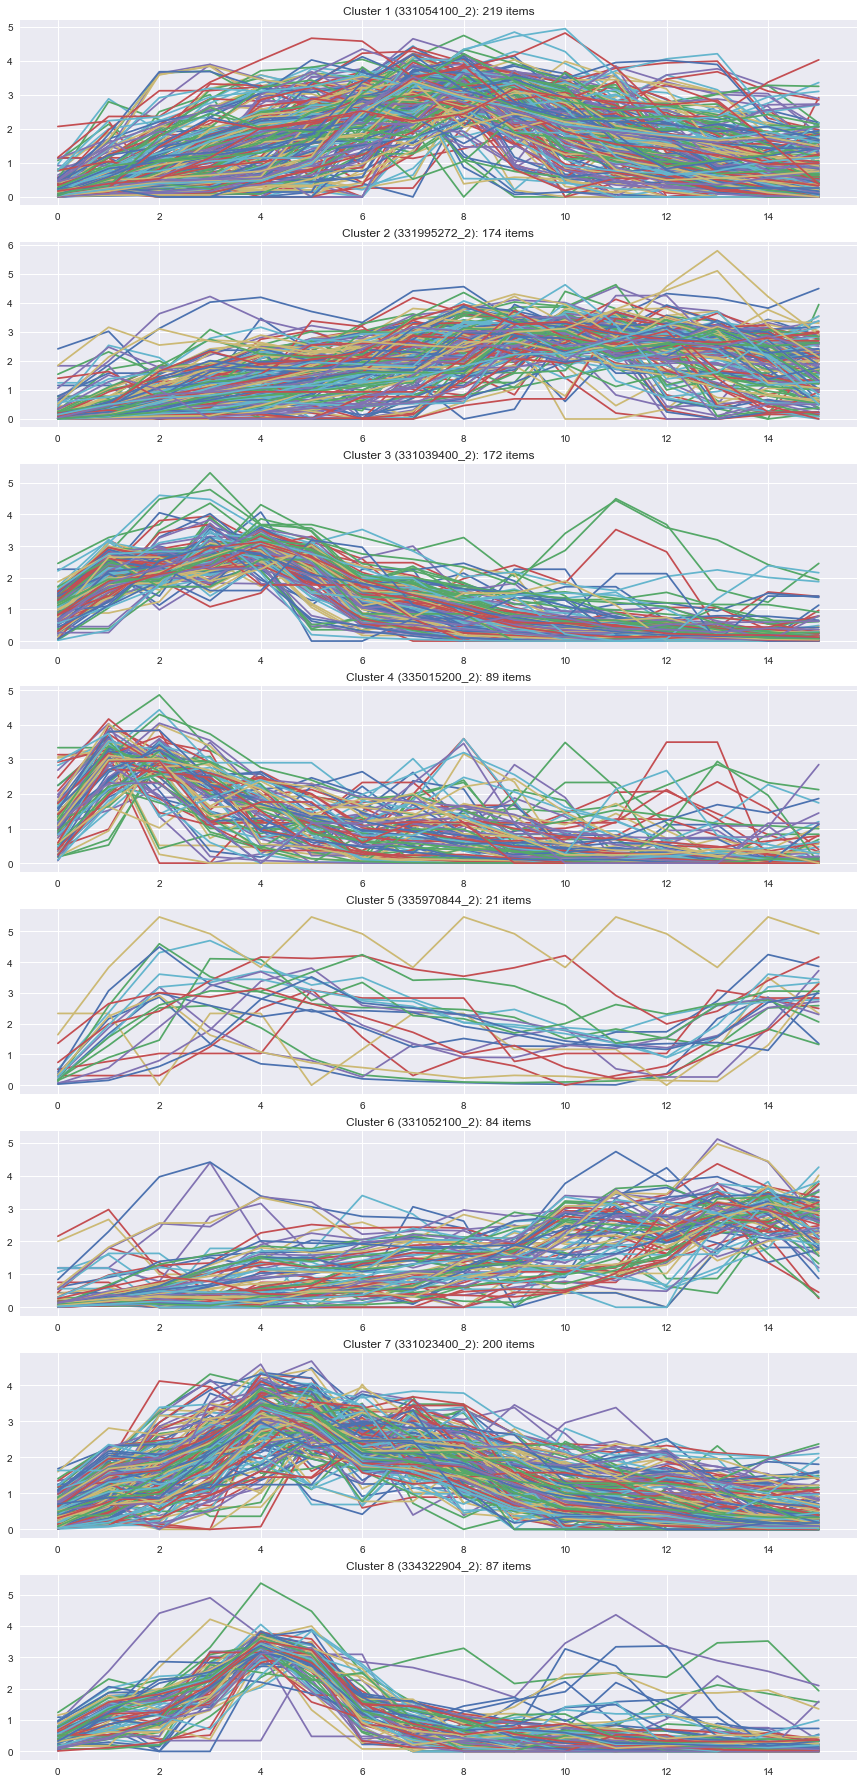

In [52]:
%matplotlib inline
plot_df = clean_df.join(prd_cluster_df,how="inner")
viz.cluster_plot(plot_df,centroid_only = False)

## 4. Build features

In [ ]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/features/build_features.py

## 5. Train classifier

## 6. Train Predictor